In [1]:
from functions import *

# Step 01: Converting JSON Files to Tabular Dataset

## 1.1. Choosing Files To Convert

In [2]:
df = pd.read_csv('_test.csv')

In [4]:
len(df['CIK'].unique())

51

In [5]:
df

,CIK,Frame,Assets,CommonStockValue,EarningsPerShareBasic,GrossProfit,NetIncomeLoss
0,89439,CY2012Q1,1.445962e+09,401000.0,0.86,8.449300e+07,32599000.0
1,89439,CY2012Q2,1.272440e+09,401000.0,0.47,7.124800e+07,17917000.0
2,89439,CY2012Q3,1.039416e+09,401000.0,0.41,6.444700e+07,15511000.0
3,89439,CY2012Q4,1.104155e+09,401000.0,0.59,6.528700e+07,16368000.0
4,89439,CY2013Q1,1.142913e+09,401000.0,0.47,7.684000e+07,26202000.0
...,...,...,...,...,...,...,...
2170,310764,CY2022Q3,3.598300e+10,NaN,2.16,2.782000e+09,816000000.0
2171,310764,CY2022Q4,3.688400e+10,NaN,1.48,3.236000e+09,563000000.0
2172,310764,CY2023Q1,3.683000e+10,NaN,1.56,3.016000e+09,592000000.0
2173,310764,CY2023Q2,3.740900e+10,NaN,1.95,3.181000e+09,738000000.0


In [6]:
sic = pd.read_csv('sic_counts.csv')

In [21]:
sic.iloc[1:]

,SIC,Count,Description
1,2834.0,1087,Pharmaceutical Preparations
2,6770.0,1045,Blank Checks
3,7372.0,653,Services-Prepackaged Software
4,6798.0,502,Real Estate Investment Trusts
5,1311.0,441,Crude Petroleum & Natural Gas
...,...,...,...
430,7384.0,1,Services-Photofinishing Laboratories
431,3260.0,1,Pottery & Related Products
432,2092.0,1,Prepared Fresh or Frozen Fish & Seafoods
433,2253.0,1,Knit Outerwear Mills


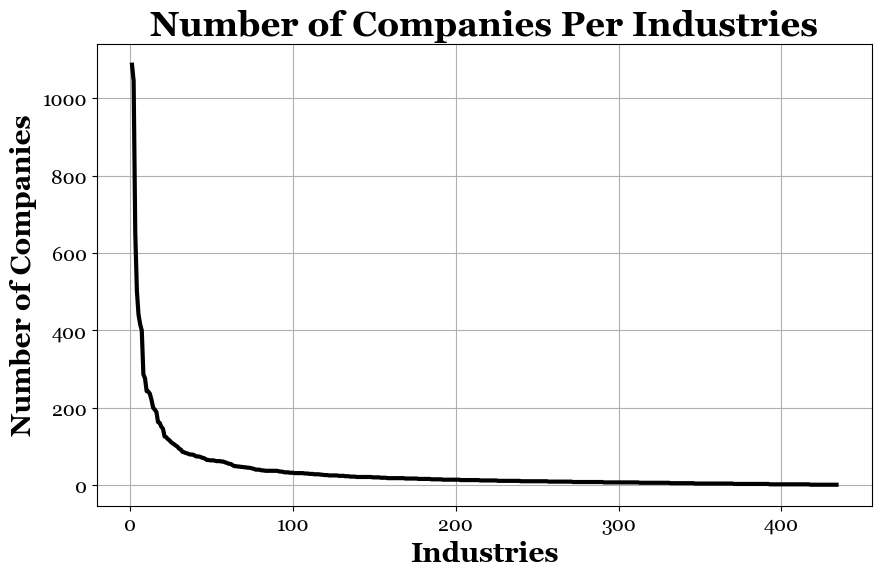

In [50]:
numbers = sic.iloc[1:]['Count']#df.iloc[:, 0]  # Assuming the first column contains numbers
labels = sic.iloc[1:]['SIC'] 
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(numbers,color='black',linewidth=3)  # Plot numbers against labels
plt.xlabel('Industries', fontsize=20, fontweight = 'bold')  # X-axis label
plt.ylabel('Number of Companies', fontsize=20, fontweight = 'bold')   # Y-axis label
plt.title('Number of Companies Per Industries', fontsize=25, fontweight = 'bold')  # Plot title
plt.grid(True)  # Show grid
plt.xticks(fontname='Georgia')  # Set font to Georgia for x-axis labels
plt.yticks(fontname='Georgia') 
plt.show()  # Show plot


In [51]:
sub = pd.read_csv('Submissions.csv')

In [52]:
sub

,CIK,Type,SIC,Description,Name,Ticker,Exchange
0,743870,operating,6500.0,Real Estate,RANCON REALTY FUND IV,[],[]
1,815097,operating,4400.0,Water Transportation,CARNIVAL CORP,['CCL'],['NYSE']
2,1466739,operating,7361.0,Services-Employment Agencies,Next Galaxy Corp.,[],[]
3,1841661,operating,6770.0,Blank Checks,AF Acquisition Corp.,[],[]
4,1831099,other,7370.0,"Services-Computer Programming, Data Processing...",AFR Inc.,[],[]
...,...,...,...,...,...,...,...
17687,899749,operating,6798.0,Real Estate Investment Trusts,"HRTI, LLC",[],[]
17688,1524083,operating,7374.0,Services-Computer Processing & Data Preparation,ChatChing Inc.,[],[]
17689,1381668,operating,6035.0,"Savings Institution, Federally Chartered",TFS Financial CORP,['TFSL'],['Nasdaq']
17690,1354772,operating,6035.0,"Savings Institution, Federally Chartered",NORTHEAST COMMUNITY BANCORP INC,[],[]


In [192]:
df_list = list(sub[sub['SIC']==6022]['CIK'])

In [193]:
def Step01A_CikToFile(num_list):
    newlist = []
    for i in num_list:
        if len(str(i))==4:
            newlist.append('companyfacts/CIK000000' + str(i)+'.json')
        if len(str(i))==5:
            newlist.append('companyfacts/CIK00000' + str(i)+'.json')
        if len(str(i))==6:
            newlist.append('companyfacts/CIK0000' + str(i)+'.json')
        if len(str(i))==7:
            newlist.append('companyfacts/CIK000' + str(i)+'.json')
    return newlist

In [194]:
new_list = Step01A_CikToFile(df_list)

## 1.2 Converting & Merging JSON Files.

In [195]:
def Step01B_ConvertorMultiple(file_paths):
    all_dfs = []
    
    for idx, path in enumerate(file_paths, start=1):
        with open(path, 'r') as json_file:
            data = json.load(json_file)

        columns = set()
        values = {}
        
        try:
            cik = data['cik']
            entity_name = data['entityName']
            us_gaap_facts = data['facts']['us-gaap']
        except KeyError as e:
            print(f"Key {e} missing in file {path}. Skipping this file.")
            continue

        for key, value in us_gaap_facts.items():
            for unit_key in value['units'].keys():
                for entry in value['units'][unit_key]:
                    try:
                        if 'frame' in entry:
                            frame = entry['frame']
                            if frame.endswith('I'):
                                frame = frame[:-1]
                            row_key = (frame, cik)
                            columns.add(key)
                            values.setdefault(row_key, {}).update({
                                'CIK': cik,
                                'EntityName': entity_name,
                                'Form': entry['form'],
                                'FP': entry['fp'],
                                'End': entry['end'],
                                'Filed': entry['filed'],
                                'Frame': frame,
                                key: entry['val']
                            })
                    except KeyError as e:
                        print(f"Key {e} missing in entry for {key}. Skipping this entry.")

        df = pd.DataFrame.from_dict(values, orient='index')
        all_dfs.append(df)

    merged_df = pd.concat(all_dfs, ignore_index=True)
    return merged_df

In [ ]:
def v2_Step01B_ConvertorMultiple(file_paths):
    all_dfs = []
    
    for idx, path in enumerate(file_paths, start=1):
        with open(path, 'r') as json_file:
            data = json.load(json_file)

        columns = set()
        values = {}
        
        try:
            cik = data['cik']
            entity_name = data['entityName']
            us_gaap_facts = data['facts']['us-gaap']
            dei = data['facts']['dei']
        except KeyError as e:
            print(f"Key {e} missing in file {path}. Skipping this file.")
            continue

        for key, value in us_gaap_facts.items():
            for unit_key in value['units'].keys():
                for entry in value['units'][unit_key]:
                    try:
                        if 'frame' in entry:
                            frame = entry['frame']
                            if frame.endswith('I'):
                                frame = frame[:-1]
                            row_key = (frame, cik)
                            columns.add(key)
                            values.setdefault(row_key, {}).update({
                                'CIK': cik,
                                'EntityName': entity_name,
                                'Form': entry['form'],
                                'FP': entry['fp'],
                                'End': entry['end'],
                                'Filed': entry['filed'],
                                'Frame': frame,
                                key: entry['val']
                            })
                    except KeyError as e:
                        print(f"Key {e} missing in entry for {key}. Skipping this entry.")
        
        for key, value in dei.items():
            for unit_key in value['units'].keys():
                for entry in value['units'][unit_key]:
                    try:
                        if 'frame' in entry:
                            frame = entry['frame']
                            if frame.endswith('I'):
                                frame = frame[:-1]
                            row_key = (frame, cik)
                            columns.add(key)
                            values.setdefault(row_key, {}).update({
                                'CIK': cik,
                                'EntityName': entity_name,
                                'Form': entry['form'],
                                'FP': entry['fp'],
                                'End': entry['end'],
                                'Filed': entry['filed'],
                                'Frame': frame,
                                key: entry['val']
                            })
                    except KeyError as e:
                        print(f"Key {e} missing in entry for {key}. Skipping this entry.")

        df = pd.DataFrame.from_dict(values, orient='index')
        all_dfs.append(df)

    merged_df = pd.concat(all_dfs, ignore_index=True)
    return merged_df

In [196]:
merged_df = Step01B_ConvertorMultiple(new_list)

Key 'us-gaap' missing in file companyfacts/CIK0001159508.json. Skipping this file.


In [106]:
def Step01C_CikFramesEpsDrop(df):
    
    years_quarters = [
            "CY2012Q1", "CY2012Q2", "CY2012Q3", "CY2012Q4",
            "CY2013Q1", "CY2013Q2", "CY2013Q3", "CY2013Q4",
            "CY2014Q1", "CY2014Q2", "CY2014Q3", "CY2014Q4",
            "CY2015Q1", "CY2015Q2", "CY2015Q3", "CY2015Q4",
            "CY2016Q1", "CY2016Q2", "CY2016Q3", "CY2016Q4",
            "CY2017Q1", "CY2017Q2", "CY2017Q3", "CY2017Q4",
            "CY2018Q1", "CY2018Q2", "CY2018Q3", "CY2018Q4",
            "CY2019Q1", "CY2019Q2", "CY2019Q3", "CY2019Q4",
            "CY2020Q1", "CY2020Q2", "CY2020Q3", "CY2020Q4",
            "CY2021Q1", "CY2021Q2", "CY2021Q3", "CY2021Q4",
            "CY2022Q1", "CY2022Q2", "CY2022Q3", "CY2022Q4",
            "CY2023Q1", "CY2023Q2", "CY2023Q3", "CY2023Q4"
        ]

    df = df[df['Frame'].isin(years_quarters)]
    df = df.sort_values(['CIK','Frame'])
    df = df.drop(['EntityName', 'Form', 'FP', 'End', 'Filed'],axis=1)
    df = df.dropna(subset=['EarningsPerShareBasic'])

    return df

In [107]:
df = Step01C_CikFramesEpsDrop(merged_df)

In [108]:
df.shape

(9709, 5698)

In [109]:
merged_df.shape

(18431, 5703)

In [122]:
no_eps = merged_df[merged_df['EarningsPerShareBasic'].isna()]

In [124]:
years_quarters = [
            "CY2012Q1", "CY2012Q2", "CY2012Q3", "CY2012Q4",
            "CY2013Q1", "CY2013Q2", "CY2013Q3", "CY2013Q4",
            "CY2014Q1", "CY2014Q2", "CY2014Q3", "CY2014Q4",
            "CY2015Q1", "CY2015Q2", "CY2015Q3", "CY2015Q4",
            "CY2016Q1", "CY2016Q2", "CY2016Q3", "CY2016Q4",
            "CY2017Q1", "CY2017Q2", "CY2017Q3", "CY2017Q4",
            "CY2018Q1", "CY2018Q2", "CY2018Q3", "CY2018Q4",
            "CY2019Q1", "CY2019Q2", "CY2019Q3", "CY2019Q4",
            "CY2020Q1", "CY2020Q2", "CY2020Q3", "CY2020Q4",
            "CY2021Q1", "CY2021Q2", "CY2021Q3", "CY2021Q4",
            "CY2022Q1", "CY2022Q2", "CY2022Q3", "CY2022Q4",
            "CY2023Q1", "CY2023Q2", "CY2023Q3", "CY2023Q4"
        ]


In [125]:
no_eps = no_eps[no_eps['Frame'].isin(years_quarters)]

In [130]:
asd = list(no_eps['Frame'])

In [131]:
q4 = []
for i in asd:
    if i.endswith('4'):
        q4.append(i)

In [134]:
len(asd)

1965

In [135]:
len(q4)

1480

# Dealing with Missing EPS

In [137]:
no_eps = merged_df[merged_df['EarningsPerShareBasic'].isna()]

In [140]:
3803/18431

0.20633714936791275

In [144]:
df_list = [944745,1609065,715072]

In [145]:
new_list = Step01A_CikToFile(df_list)

In [146]:
new_list

['companyfacts/CIK0000944745.json',
 'companyfacts/CIK0001609065.json',
 'companyfacts/CIK0000715072.json']

In [147]:
merged_chosen = Step01B_ConvertorMultiple(new_list)

In [149]:
def na_max(df,threshold):

    missing_values = df.isnull().sum()

    # Calculate the percentage of missing values in each column
    missing_percentage = missing_values / len(df)

    # Get the columns where the missing percentage is greater than the threshold
    columns_to_drop = missing_percentage[missing_percentage > threshold].index

    # Drop the columns from the DataFrame
    df = df.drop(columns=columns_to_drop)
    return df

In [152]:
na_maxed = na_max(merged_chosen,0.2)

In [153]:
na_maxed.shape

(197, 14)

In [164]:
df1 = merged_chosen[['InterestExpense','NetIncomeLoss','EarningsPerShareBasic']]

In [163]:
df2=merged_chosen[merged_chosen.columns[:7]]

In [170]:
merged_new = pd.concat([df2,df1],axis=1)

In [172]:
merged_new.to_csv('eps_missing.csv',index=False)

In [174]:
merged_chosen.to_csv('eps_missing_2.csv',index=False)

In [176]:
years = ['CY2012', 'CY2013', 'CY2014', 'CY2015', 'CY2016', 'CY2017', 'CY2018', 'CY2019', 'CY2020', 'CY2021', 'CY2022','CY2023']


In [177]:
merged_df = merged_df[merged_df['Frame'].isin(years)]

In [179]:
df_cleaned = merged_df.dropna(axis='columns', how='all')

In [181]:
df_cleaned.to_csv('all_annual.csv',index=False)

In [182]:
df_info(df_cleaned)

(0.94, (2730, 2683))

In [187]:
na_maxed = na_max(df_cleaned,0.4)
print(df_info(na_maxed))

(0.19, (2730, 60))


In [188]:
na_maxed

,CIK,EntityName,Form,FP,End,Filed,Frame,AccretionAmortizationOfDiscountsAndPremiumsInvestments,AmortizationOfIntangibleAssets,BankOwnedLifeInsuranceIncome,...,ProfessionalFees,ProvisionForLoanAndLeaseLosses,WeightedAverageNumberOfDilutedSharesOutstanding,WeightedAverageNumberOfSharesOutstandingBasic,ShareBasedCompensation,IncreaseDecreaseInOtherOperatingAssets,CurrentFederalTaxExpenseBenefit,IncomeTaxReconciliationTaxExemptIncome,CurrentStateAndLocalTaxExpenseBenefit,DeferredFederalIncomeTaxExpenseBenefit
0,944745,"Civista Bancshares, Inc.",10-K,FY,2013-12-31,2016-03-15,CY2013,-1633000.0,846000.0,555000.0,...,1677000.0,1100000.0,7821780.0,7707917.0,NaN,NaN,NaN,NaN,NaN,NaN
1,944745,"Civista Bancshares, Inc.",10-K,FY,2014-12-31,2017-03-15,CY2014,-1491000.0,769000.0,492000.0,...,1855000.0,1500000.0,10904848.0,7707917.0,NaN,NaN,NaN,NaN,NaN,NaN
2,944745,"Civista Bancshares, Inc.",10-K,FY,2015-12-31,2018-03-08,CY2015,-1410000.0,711000.0,467000.0,...,2461000.0,1200000.0,10918335.0,7822369.0,106000.0,NaN,NaN,NaN,NaN,NaN
3,944745,"Civista Bancshares, Inc.",10-K,FY,2016-12-31,2019-03-15,CY2016,-1383000.0,699000.0,563000.0,...,1895000.0,-1300000.0,10950961.0,8010399.0,323000.0,NaN,NaN,NaN,NaN,NaN
4,944745,"Civista Bancshares, Inc.",10-K,FY,2017-12-31,2020-03-16,CY2017,-1263000.0,586000.0,573000.0,...,2300000.0,NaN,12352616.0,9906856.0,426000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18417,736772,CNB FINANCIAL CORP/PA,10-K,FY,2019-12-31,2022-03-03,CY2019,NaN,NaN,1317000.0,...,NaN,6024000.0,15164000.0,15164000.0,1346000.0,-1072000.0,8265000.0,1382000.0,499000.0,-204000.0
18418,736772,CNB FINANCIAL CORP/PA,10-K,FY,2020-12-31,2023-03-03,CY2020,NaN,NaN,1747000.0,...,NaN,15354000.0,16000000.0,16000000.0,1410000.0,6242000.0,8681000.0,1119000.0,729000.0,-1672000.0
18419,736772,CNB FINANCIAL CORP/PA,10-K,FY,2021-12-31,2023-03-03,CY2021,NaN,NaN,2638000.0,...,NaN,6003000.0,16820000.0,16820000.0,1411000.0,1056000.0,13494000.0,1016000.0,1268000.0,-1025000.0
18420,736772,CNB FINANCIAL CORP/PA,10-Q,Q3,2022-12-31,2023-11-01,CY2022,NaN,NaN,3433000.0,...,NaN,NaN,18020000.0,17987000.0,1248000.0,19065000.0,15494000.0,1036000.0,1346000.0,-1618000.0


In [191]:
df_cleaned[df_cleaned['CIK']==35527].dropna(axis='columns', how='all').to_csv('annual_35527.csv',index=False)

# Full model on Annual Data

In [206]:
merged_df = merged_df[(merged_df['Form']=='10-K') & (merged_df['FP']=='FY')]

In [207]:
merged_df.shape

(7512, 5703)

In [208]:
merged_df = merged_df[merged_df['Frame'].isin(years)]

In [209]:
merged_df.shape

(2613, 5703)

In [211]:
merged_df = merged_df.dropna(axis='columns', how='all')

In [213]:
merged_df.shape

(2613, 2654)

In [214]:
df = merged_df

In [215]:
df = df.sort_values(['CIK','Frame'])
df = df.drop(['EntityName', 'Form', 'FP', 'End', 'Filed'],axis=1)
df = df.dropna(subset=['EarningsPerShareBasic'])

In [221]:
df.shape

(2485, 2649)

In [223]:
def Step02_PercentageDifference(df):
    df_2 = df[df.columns[2:]].pct_change(fill_method=None).round(3)
    df_1 = df[df.columns[:2]]
    df = pd.concat([df_1,df_2],axis=1)
    pivoted = pd.pivot_table(df, index=['CIK', 'Frame'])
    rows_to_drop = pivoted.groupby(level=0).head(1).index
    pivoted = pivoted.drop(rows_to_drop)
    pivoted = pivoted.reset_index()
    pivoted = pivoted.fillna(0)
    return pivoted

In [224]:
def process_in_chunks(df, key_column_1, key_column_2, number_of_shifts, n):
    # Ensure the key columns are at the front
    cols = [key_column_1, key_column_2] + [col for col in df if col not in [key_column_1, key_column_2]]
    df = df[cols]
    
    # Calculate the number of columns per chunk, excluding the first two key columns
    columns_per_chunk = (len(df.columns) - 2) // n
    
    # List to hold each processed chunk
    processed_chunks = []
    
    for i in range(0, len(df.columns) - 2, columns_per_chunk):
        # Select columns for the chunk, always include the first two key columns
        chunk_columns = [key_column_1, key_column_2] + df.columns[2+i:2+i+columns_per_chunk].tolist()
        sub_df = df[chunk_columns]
        
        # Apply the df_lagged function to the chunk
        processed_chunk = Step03_PivotLag(sub_df, key_column_1, key_column_2, number_of_shifts)
        
        # Append the processed chunk to the list
        processed_chunks.append(processed_chunk)
    
    # Concatenate all processed chunks
    merged_df = pd.concat(processed_chunks, axis=1)
    
    # Drop duplicate columns that may have been included in multiple chunks
    merged_df = merged_df.loc[:,~merged_df.columns.duplicated()]
    
    return merged_df

In [225]:
def Step04_TargetDropNA(df,lvl1,lvl2,last):
    df = pd.pivot_table(df, index=[lvl1,lvl2])
    df['target_lag'] = df.groupby(level=lvl1)[last].shift(-1)
    df['target'] = 0
    df.loc[df[last] < df[df.columns[-2]], 'target'] = 1
    df.loc[df[last] > df[df.columns[-2]], 'target'] = 0
    df = df.drop('target_lag',axis=1)
    df = df.reset_index()
    df = df.drop(lvl1,axis=1)
    df = df.drop(lvl2,axis=1)
    df = df.dropna()
    df = df.replace([np.inf, -np.inf, np.nan], 0).round(2)
    return df

In [241]:
def Step03_PivotLag(df, level_1, level_2, shift):
    shift_periods = [-i for i in range(1, shift + 1)]
    pivoted = pd.pivot_table(df, index=[level_1, level_2])
    new_columns = {}

    for col in pivoted.columns:
        for period in shift_periods:
            new_col_name = f'{col}_{abs(period)}'
            new_columns[new_col_name] = pivoted.groupby(level=level_1)[col].shift(periods=period)

    # Use pd.concat to join all new columns at once
    pivoted = pd.concat([pivoted, pd.DataFrame(new_columns, index=pivoted.index)], axis=1)
    desired_order = sorted(list(pivoted.columns))
    pivoted = pivoted[desired_order]
    pivoted = pivoted.reset_index()
    return pivoted

In [247]:
def everything(df,threshold,lvl1,lvl2,shift,chunk,target_shift,testsize):
    na_maxed = na_max(df,threshold)
    df_2 = Step02_PercentageDifference(na_maxed)
    merged = process_in_chunks(df_2,lvl1,lvl2,shift,chunk)
    df_targeted=Step04_TargetDropNA(merged,lvl1,lvl2,target_shift)
    df_shuffled = df_targeted.sample(frac=1, random_state=42)
    train_set, test_set = train_test_split(df_shuffled, test_size=testsize, random_state=42)
    df = train_set
    df2 = test_set
    rf_model, train_accuracy, train_roc_auc = train_random_forest(df, 'target')
    feature_importances = rf_model.feature_importances_
    # Create a pandas series with the feature importances
    importances = pd.Series(feature_importances, index=df.columns[:-1])  # assuming last column is 'target'
    # Sort the feature importances in descending order
    sorted_importances = importances.sort_values(ascending=False)

    # Print the feature importances
    print("Feature Importances:\n", sorted_importances)
    save_model(rf_model, 'random_forest_classifier.joblib')
    rf_model_loaded = load_model('random_forest_classifier.joblib')
    unseen_accuracy, unseen_roc_auc = evaluate_model(rf_model_loaded, df2, 'target')
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Training ROC AUC: {train_roc_auc}")
    print(f"Unseen Data Accuracy: {unseen_accuracy}")
    print(f"Unseen Data ROC AUC: {unseen_roc_auc}")
    print(df_info(df))

    return train_accuracy, train_roc_auc, unseen_accuracy, unseen_roc_auc, feature_importances

In [254]:
threshold = 0.5       #Threshold of Missing Values in a column
lvl1      = 'CIK'     #Level 1 index to pivot.
lvl2      = 'Frame'   #Level 2 index to pivot. 
shift    = 1       #Number of Shifts/Lags
chunk    = 10        #Chunks to Divide
target_shift    = f'EarningsPerShareBasic_{shifts}' #Target column make into target.
testsize = 0.3       #Test split size for first round.

train_accuracy, train_roc_auc, unseen_accuracy, unseen_roc_auc, feature_importances = everything(df,threshold,lvl1,lvl2,shift,chunk,target_shift,testsize)

Feature Importances:
 EarningsPerShareBasic_1                                                                       0.075401
EarningsPerShareDiluted_1                                                                     0.065241
NetIncomeLoss_1                                                                               0.048665
NetIncomeLossAvailableToCommonStockholdersBasic_1                                             0.017633
InterestExpense                                                                               0.016575
                                                                                                ...   
Depreciation                                                                                  0.002729
OtherComprehensiveIncomeLossReclassificationAdjustmentFromAOCIForSaleOfSecuritiesBeforeTax    0.002706
GainsLossesOnSalesOfOtherRealEstate_1                                                         0.002671
PaymentsForRepurchaseOfCommonStock                 

# Convertor for only 10K

In [14]:
import json
import pandas as pd

def Convertor_10K(file_paths):
    all_dfs = []
    columns = ['CIK', 'EntityName', 'Form', 'FP', 'End', 'Filed', 'Frame']  # Define the columns explicitly

    for path in file_paths:
        with open(path, 'r') as json_file:
            data = json.load(json_file)

        values = {}
        
        try:
            cik = data['cik']
            entity_name = data['entityName']
            us_gaap_facts = data['facts']['us-gaap']
        except KeyError as e:
            print(f"Key {e} missing in file {path}. Skipping this file.")
            continue

        for key, value in us_gaap_facts.items():
            for unit_key in value['units'].keys():
                for entry in value['units'][unit_key]:
                    try:
                        if 'frame' in entry and entry['form'] == '10-K' and entry['fp'] == 'FY':
                            frame = entry['frame']
                            if len(frame) == 6:
                                if frame.endswith('I'):
                                    frame = frame[:-1]
                                row_key = (frame, cik)
                                columns.append(key)  # Add the key to the columns list
                                values.setdefault(row_key, {}).update({
                                    'CIK': cik,
                                    'EntityName': entity_name,
                                    'Form': entry['form'],
                                    'FP': entry['fp'],
                                    'End': entry['end'],
                                    'Filed': entry['filed'],
                                    'Frame': frame,
                                    key: entry['val']
                                })
                    except KeyError as e:
                        print(f"Key {e} missing in entry for {key}. Skipping this entry.")

        df = pd.DataFrame.from_dict(values, orient='index', columns=sorted(set(columns)))  # Use sorted set of columns
        all_dfs.append(df)

    merged_df = pd.concat(all_dfs, ignore_index=True)
    return merged_df


In [2]:
sub = pd.read_csv('Submissions.csv')

In [3]:
df_list = list(sub[sub['SIC']==2834]['CIK'].unique())

In [285]:
df_list = list(sub['CIK'].unique())

In [4]:
new_list = Step01A_CikToFile(df_list)

In [ ]:
merged_19k = Convertor_10K(new_list)

In [ ]:
merged_2834 = Convertor_10K(new_list)

In [10]:
daf = merged_2834[merged_2834['EarningsPerShareBasic'].isna()]

In [13]:
daf[['CIK','EarningsPerShareBasic']]

,CIK,EarningsPerShareBasic
0,1069308,NaN
1,1069308,NaN
2,1069308,NaN
3,1069308,NaN
4,1069308,NaN
...,...,...
7408,1178879,NaN
7409,1178879,NaN
7410,1178879,NaN
7411,1178879,NaN


In [277]:
df_info(merged_19k)

(0.97, (7417, 2791))

In [281]:
maxed = na_max(merged_19k,0.8)
df_info(maxed)

(0.56, (7417, 94))

In [1]:
merged_19k

NameError: name 'merged_19k' is not defined

# Tag with multiple units

In [2]:
df = pd.read_csv('all_annual.csv')

In [8]:
daf = df[df['DefinedBenefitPlanAmortizationOfPriorServiceCostCredit'].notna()]

In [10]:
daf[['CIK','DefinedBenefitPlanAmortizationOfPriorServiceCostCredit']]['CIK'].unique()

array([ 759944, 1522420, 1277902, 1769617,  946647,  880116,  722256,
       1093672, 1594012,  723646,  714562,  715579,  922487,  701853,
        729986,  835324,  740806,  320387, 1013272,  706863,  353191,
       1668224, 1323648, 1823608,  356171,  719220,  859070, 1366367,
         22356,  770460,  933590,  714395,  703329,  716605, 1212545,
        731653,  726601,  714530,  798941,  920427,  857855, 1047170,
       1093728])

In [ ]:
import os
import json

# Replace 'your_folder_path' with the path to your folder containing JSON files
folder_path = 'companyfacts'

for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            try:
                # Load the JSON data from the file
                json_data = json.load(file)
                
                
                # Replace 'key' with the key where the subkey is located
                # Check if the subkey exists and meets the condition
                if subkey in json_data['key'] and json_data['key'][subkey] == condition:
                    # Append the data to the list
                    data_list.append(json_data)
            except json.JSONDecodeError:
                print(f"Error decoding JSON from file {filename}")

# Do something with the data_list
# For example, print it
print(data_list)


In [12]:
with open('companyfacts/CIK0000759944.json', 'r') as file:
    data = json.load(file)

In [37]:
folder_path = 'companyfacts'
original_df = pd.DataFrame(
    {
        'Company': [],
        'B': [],
        'subkeys': []
    }
)
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            for key,value in data['facts']['us-gaap'].items():
                asd = []
                for i in value['units'].keys():
                    asd.append(i)
                    if len(asd)>1:
                        new_data = [
                            {'Company':filename,
                             'Key': key,
                             'subkeys': asd
                            }
                        ]
                        new_data = pd.DataFrame(new_data)
                        pd.concat([original_df, new_data], ignore_index=True)
                        

DebtSecuritiesAvailableForSaleContinuousUnrealizedLossPosition12MonthsOrLongerNumberOfPositions
DebtSecuritiesAvailableForSaleContinuousUnrealizedLossPositionLessThan12MonthsNumberOfPositions
DebtSecuritiesAvailableForSaleUnrealizedLossPositionNumberOfPositions
NumberOfReportingUnits
NumberOfReportingUnits


In [10]:
folder_path = 'companyfacts'
original_df = pd.DataFrame(
    {
        'Company': [],
        'Key': [],  # Changed 'B' to 'Key' to match the keys used later
        'subkeys': []
    }
)

for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            for key, value in data['facts']['us-gaap'].items():
                asd = list(value['units'].keys())
                if len(asd) > 1:
                    new_data = pd.DataFrame(
                        [{
                            'Company': filename.replace('.json', ''),  # Remove the file extension from the company name
                            'Key': key,
                            'subkeys': asd
                        }]
                    )
                    original_df = pd.concat([original_df, new_data], ignore_index=True)  # Assign the result back to original_df


KeyError: 'us-gaap'

In [7]:
df = pd.DataFrame()

In [8]:
df

""


In [9]:
df.append(['asd','asdff'])

/var/folders/rg/tjzq_l195rgdqwr9j37d24n00000gn/T/ipykernel_50093/2821761998.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(['asd','asdff'])


,0
0,asd
1,asdff


In [2]:
df = Convertor_Single('companyfacts/CIK0000759944.json')

In [6]:
df[['CIK','Frame','NumberOfReportingUnits']]

,,CIK,Frame,NumberOfReportingUnits
CY2013Q4,759944,759944,CY2013Q4,NaN
CY2014Q4,759944,759944,CY2014Q4,NaN
CY2015Q4,759944,759944,CY2015Q4,NaN
CY2016Q4,759944,759944,CY2016Q4,NaN
CY2017Q4,759944,759944,CY2017Q4,NaN
CY2018Q4,759944,759944,CY2018Q4,NaN
CY2019Q4,759944,759944,CY2019Q4,NaN
CY2020Q4,759944,759944,CY2020Q4,NaN
CY2021Q4,759944,759944,CY2021Q4,NaN
CY2022Q4,759944,759944,CY2022Q4,NaN


# Missing EPS 10Qs

In [3]:
sub = pd.read_csv('Submissions.csv')

In [7]:
df_list = list(sub[sub['SIC']==2834]['CIK'].unique())

In [8]:
new_list = Step01A_CikToFile(df_list)

In [2]:
df = pd.read_csv('df_37.csv')

In [3]:
df.shape

(11913, 6470)

In [36]:
daf = df[df.columns[:7].tolist() + d]

In [23]:
len(daf[daf['EarningsPerShareBasic'].isna()]['CIK'].unique())

294

In [21]:
len(daf['CIK'].unique())

294

In [25]:
fat = daf[daf['EarningsPerShareBasic'].isna()]

In [38]:
daf.to_csv('eps_missing_10q.csv',mode='w',index=False)

In [34]:
d = []
for i in list(df.columns):
    if i.startswith('EarningsPerShare'):
        d.append(i)

In [42]:
all_missing = daf[daf[d].isna().all(axis=1)]

In [48]:
len(all_missing['CIK'].unique())

259

In [37]:
years_quarters = [
            "CY2012Q1", "CY2012Q2", "CY2012Q3", "CY2012Q4",
            "CY2013Q1", "CY2013Q2", "CY2013Q3", "CY2013Q4",
            "CY2014Q1", "CY2014Q2", "CY2014Q3", "CY2014Q4",
            "CY2015Q1", "CY2015Q2", "CY2015Q3", "CY2015Q4",
            "CY2016Q1", "CY2016Q2", "CY2016Q3", "CY2016Q4",
            "CY2017Q1", "CY2017Q2", "CY2017Q3", "CY2017Q4",
            "CY2018Q1", "CY2018Q2", "CY2018Q3", "CY2018Q4",
            "CY2019Q1", "CY2019Q2", "CY2019Q3", "CY2019Q4",
            "CY2020Q1", "CY2020Q2", "CY2020Q3", "CY2020Q4",
            "CY2021Q1", "CY2021Q2", "CY2021Q3", "CY2021Q4",
            "CY2022Q1", "CY2022Q2", "CY2022Q3", "CY2022Q4",
            "CY2023Q1", "CY2023Q2", "CY2023Q3", "CY2023Q4"
        ]

In [46]:
all_missing = all_missing[all_missing['Frame'].isin(years_quarters)]

In [49]:
all_missing.to_csv('all_missing.csv',index=False)

In [3]:
df = pd.read_csv('eps_missing_10q.csv')

In [6]:
df = df[df['Frame'].isin(years_quarters)]

In [8]:
df.to_csv('eps_missing_10q_from2012.csv',mode='w',index=False)

# Calculating EPS by hand

In [9]:
df = pd.read_csv('df_37.csv')

In [14]:
d=[]
for i in list(df.columns):
    if 'netincome' in i.lower():
        d.append(i)

In [28]:
s = df.columns[:7].tolist()

In [29]:
s.append('NetIncomeLoss')

In [32]:
df[s].to_csv('netincome.csv',index=False)

In [38]:
daf = df[s]

In [39]:
daf = daf[daf['Frame'].isin(years_quarters)]

In [44]:
daf.to_csv('netincome_frame.csv',index=False)

In [43]:
daf[daf['NetIncomeLoss'].isna()]

,CIK,EntityName,Form,FP,End,Filed,Frame,NetIncomeLoss
2,1342643,"WORTHINGTON ENERGY, INC.",10-K,FY,2012-12-31,2014-04-16,CY2012Q4,NaN
11,1342643,"WORTHINGTON ENERGY, INC.",10-Q,Q3,2013-12-31,2015-03-05,CY2013Q4,NaN
35,1506814,JPX GLOBAL INC.,10-K/A,FY,2015-12-31,2017-04-19,CY2015Q4,NaN
39,1506814,JPX GLOBAL INC.,10-K,FY,2012-12-31,2015-04-15,CY2012Q4,NaN
47,1506814,JPX GLOBAL INC.,10-K,FY,2013-12-31,2016-04-14,CY2013Q4,NaN
...,...,...,...,...,...,...,...,...
11870,910073,"NEW YORK COMMUNITY BANCORP, INC.",10-K,FY,2017-12-31,2019-03-01,CY2017Q4,NaN
11873,910073,"NEW YORK COMMUNITY BANCORP, INC.",10-K,FY,2018-12-31,2020-02-28,CY2018Q4,NaN
11876,910073,"NEW YORK COMMUNITY BANCORP, INC.",10-K,FY,2019-12-31,2021-02-26,CY2019Q4,NaN
11879,910073,"NEW YORK COMMUNITY BANCORP, INC.",10-K,FY,2020-12-31,2022-02-25,CY2020Q4,NaN


In [45]:
df = pd.read_csv('netincome.csv')

In [47]:
years = [
            "CY2012", "CY2013","CY2014","CY2015","CY2016","CY2017","CY2018",
    "CY2019", "CY2020","CY2021","CY2022","CY2023"
        ]

In [48]:
df = df[df['Frame'].isin(years)]

In [50]:
df[df['NetIncomeLoss'].isna()]

,CIK,EntityName,Form,FP,End,Filed,Frame,NetIncomeLoss
417,1645873,"MODIV INDUSTRIAL, INC.",10-K,FY,2015-12-31,2017-04-03,CY2015,NaN
630,1620070,DNA TESTING CENTERS CORP,10-K,FY,2013-12-31,2016-06-13,CY2013,NaN
1039,1295810,"Sunstone Hotel Investors, Inc.",10-K,FY,2017-12-31,2020-02-19,CY2017,NaN
1040,1295810,"Sunstone Hotel Investors, Inc.",10-K,FY,2018-12-31,2021-02-12,CY2018,NaN
1041,1295810,"Sunstone Hotel Investors, Inc.",10-K,FY,2019-12-31,2022-02-23,CY2019,NaN
...,...,...,...,...,...,...,...,...
11073,1857518,Jaguar Global Growth Corporation I,10-Q,Q1,2022-03-31,2022-05-16,CY2021,NaN
11304,1631282,DATASEA INC.,10-K,FY,2015-06-30,2016-09-28,CY2015,NaN
11444,1824036,IDEX Biometrics ASA,20-F,FY,2021-12-31,2023-04-26,CY2021,NaN
11445,1824036,IDEX Biometrics ASA,20-F,FY,2022-12-31,2023-04-26,CY2022,NaN


In [51]:
df.shape

(1811, 8)

In [53]:
df.to_csv('netincome_annual.csv',index=False)

# Calculating missing quarter of net income

In [70]:
df = pd.read_csv('_data/netincome_test.csv')

In [ ]:
def calculate_missing_quarters(df):
    # Iterate over each CIK
    for cik in df['CIK'].unique():
        # Extract unique years from the 'Frame' column
        years = df['Frame'].str.extract(r'(CY\d{4})')[0].unique()
        for year in years:
            # Calculate the sum of known quarters for the current CIK and year
            known_quarters_sum = df[(df['CIK'] == cik) & df['Frame'].str.startswith(year) & 
                                    (df['Frame'].str.len() > 6) & (~df['NetIncomeLoss'].isna())]['NetIncomeLoss'].sum()
            # Define the annual frame
            annual_frame = year
            # Find the row for the annual data
            annual_row = df[(df['CIK'] == cik) & (df['Frame'] == annual_frame)]
            # Check if the annual row is not empty
            if not annual_row.empty:
                # Get the annual NetIncomeLoss value
                annual_value = annual_row['NetIncomeLoss'].values[0]
                # Iterate over each quarter
                for quarter in ['Q1', 'Q2', 'Q3', 'Q4']:
                    quarter_frame = year + quarter
                    quarter_row = df[(df['CIK'] == cik) & (df['Frame'] == quarter_frame)]
                    # Check if the quarter row is not empty and NetIncomeLoss is NaN
                    if not quarter_row.empty and np.isnan(quarter_row['NetIncomeLoss'].values[0]):
                        # Calculate the missing value for the quarter
                        missing_value = annual_value - known_quarters_sum
                        # Assign the missing value to the quarter's NetIncomeLoss
                        df.loc[(df['CIK'] == cik) & (df['Frame'] == quarter_frame), 'NetIncomeLoss'] = missing_value
    return df


In [71]:
df_filled = calculate_missing_quarters(df)

In [72]:
df_filled

,CIK,EntityName,Form,FP,End,Filed,Frame,NetIncomeLoss
0,8504,AGEAGLE AERIAL SYSTEMS INC.,10-K,FY,12/31/12,3/28/14,CY2012,7.411200e+05
1,8504,AGEAGLE AERIAL SYSTEMS INC.,10-Q/A,Q1,3/31/12,9/13/13,CY2012Q1,-1.081682e+06
2,8504,AGEAGLE AERIAL SYSTEMS INC.,10-Q/A,Q2,6/30/12,9/6/12,CY2012Q2,3.061726e+06
3,8504,AGEAGLE AERIAL SYSTEMS INC.,10-Q,Q3,9/30/12,11/14/13,CY2012Q3,-1.296049e+06
4,8504,AGEAGLE AERIAL SYSTEMS INC.,10-Q/A,Q1,12/31/12,9/13/13,CY2012Q4,5.712500e+04
...,...,...,...,...,...,...,...,...
169,34088,Exxon Mobil Corporation,10-Q,Q3,9/30/22,10/31/23,CY2022Q3,1.966000e+10
170,34088,Exxon Mobil Corporation,10-Q,Q3,12/31/22,10/31/23,CY2022Q4,1.275000e+10
171,34088,Exxon Mobil Corporation,10-Q,Q1,3/31/23,5/2/23,CY2023Q1,1.143000e+10
172,34088,Exxon Mobil Corporation,10-Q,Q2,6/30/23,8/1/23,CY2023Q2,7.880000e+09


In [66]:
df_filled.to_csv('_data/netincome_all_result.csv',mode='w',index=False)

# Replace all netincome values.

In [73]:
df = pd.read_csv('_data/netincome.csv')

In [74]:
df

,CIK,EntityName,Form,FP,End,Filed,Frame,NetIncomeLoss
0,4828,AMERICAN CRYSTAL SUGAR CO /MN/,10-K,FY,8/31/12,11/8/12,CY2012,548253000.0
1,4828,AMERICAN CRYSTAL SUGAR CO /MN/,10-Q,Q2,2/29/12,4/15/13,CY2012Q1,212256000.0
2,4828,AMERICAN CRYSTAL SUGAR CO /MN/,10-Q,Q3,5/31/12,7/15/13,CY2012Q2,149485000.0
3,4828,AMERICAN CRYSTAL SUGAR CO /MN/,10-Q,Q3,8/31/12,7/15/13,CY2012Q3,NaN
4,4828,AMERICAN CRYSTAL SUGAR CO /MN/,10-Q,Q1,11/30/12,1/14/13,CY2012Q4,289479000.0
...,...,...,...,...,...,...,...,...
9410,1944902,OHMYHOME LIMITED,6-K,Q2,12/31/22,10/3/23,CY2022Q4,NaN
9411,1944902,OHMYHOME LIMITED,6-K,Q2,6/30/23,10/3/23,CY2023Q2,NaN
9412,1970509,HAYMAKER ACQUISITION CORP. 4,10-Q,Q3,3/31/23,11/9/23,CY2023Q1,-5550.0
9413,1970509,HAYMAKER ACQUISITION CORP. 4,10-Q,Q2,6/30/23,9/8/23,CY2023Q2,-3931.0


In [76]:
df_filled = calculate_missing_quarters(df)

In [77]:
df_filled.to_csv('_data/netincome_all_result_skip.csv',mode='w',index=False)

### New function for skipping more than 1 missing quarters

In [75]:
import numpy as np

def calculate_missing_quarters(df):
    # Iterate over each CIK
    for cik in df['CIK'].unique():
        # Extract unique years from the 'Frame' column
        years = df['Frame'].str.extract(r'(CY\d{4})')[0].unique()
        for year in years:
            # Calculate the sum of known quarters for the current CIK and year
            known_quarters_sum = df[(df['CIK'] == cik) & df['Frame'].str.startswith(year) & 
                                    (df['Frame'].str.len() > 6) & (~df['NetIncomeLoss'].isna())]['NetIncomeLoss'].sum()
            # Define the annual frame
            annual_frame = year
            # Find the row for the annual data
            annual_row = df[(df['CIK'] == cik) & (df['Frame'] == annual_frame)]
            # Check if the annual row is not empty
            if not annual_row.empty:
                # Get the annual NetIncomeLoss value
                annual_value = annual_row['NetIncomeLoss'].values[0]
                # Count the number of missing values for the year
                missing_count = df[(df['CIK'] == cik) & df['Frame'].str.startswith(year) & 
                                   (df['Frame'].str.len() > 6) & (df['NetIncomeLoss'].isna())].shape[0]
                # If there is more than one missing value, skip to the next year
                if missing_count > 1:
                    continue
                # Otherwise, iterate over each quarter
                for quarter in ['Q1', 'Q2', 'Q3', 'Q4']:
                    quarter_frame = year + quarter
                    quarter_row = df[(df['CIK'] == cik) & (df['Frame'] == quarter_frame)]
                    # Check if the quarter row is not empty and NetIncomeLoss is NaN
                    if not quarter_row.empty and np.isnan(quarter_row['NetIncomeLoss'].values[0]):
                        # Calculate the missing value for the quarter
                        missing_value = annual_value - known_quarters_sum
                        # Assign the missing value to the quarter's NetIncomeLoss
                        df.loc[(df['CIK'] == cik) & (df['Frame'] == quarter_frame), 'NetIncomeLoss'] = missing_value
    return df
